In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



./bullet.png
./csgo.html
./DataMining.ipynb
./de_dust2.png
./de_inferno.png
./de_inferno1.png
./de_inferno_radar.png
./de_mirage.png
./de_mirage_radar.png
./de_nuke.png
./de_overpass_radar.png
./de_royal.png
./de_santorini.png
./de_season.png
./de_train.png
./de_tulip.png
./dust2_fire.png
./dust2_flash.png
./dust2_HE.png
./dust2_knife.png
./dust2_shotgun.png
./dust2_smoke.png
./dust2_zeus.png
./esea_master_dmg_demos.part1.csv
./esea_master_dmg_demos.part2.csv
./esea_master_grenades_demos.part1.csv
./esea_master_grenades_demos.part2.csv
./esea_master_kills_demos.part1.csv
./esea_master_kills_demos.part2.csv
./esea_meta_demos.part1.csv
./esea_meta_demos.part2.csv
./Infernopano.png
./inferno_fire.png
./inferno_flash.png
./inferno_HE.png
./inferno_knife.png
./inferno_shotgun.png
./inferno_smoke.png
./inferno_zeus.png
./map_data.csv
./mirage_fire.png
./mirage_flash.png
./mirage_HE.png
./mirage_knife.png
./mirage_shotgun.png
./mirage_smoke.png
./mirage_zeus.png
./mm_grenades_demos.csv
./mm_m

C:\Users\Hezhili\AppData\Local\Temp\ipykernel_4232\770083156.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gc

In [8]:
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


def import_data(file):
    """create a dataframe and optimize its memory usage"""
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df

In [9]:
# Dataframe: esea games
games_df_part1 = pd.read_csv('./esea_meta_demos.part1.csv')
games_df_part2 = pd.read_csv('./esea_meta_demos.part2.csv')
games_df = pd.concat([games_df_part1, games_df_part2])
games_df = games_df[['file', 'map', 'round', 'start_seconds', 'end_seconds', 'winner_side']]

games_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 377629 entries, 0 to 161709
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   file           377629 non-null  object 
 1   map            377629 non-null  object 
 2   round          377629 non-null  int64  
 3   start_seconds  377589 non-null  float64
 4   end_seconds    377589 non-null  float64
 5   winner_side    377628 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 20.2+ MB


In [10]:
# Dataframe: kills
kills_df_part1 = pd.read_csv('esea_master_kills_demos.part1.csv')
kills_df_part2 = pd.read_csv('esea_master_kills_demos.part2.csv')
kills_df = pd.concat([kills_df_part1, kills_df_part2])
kills_df.info()
kills_df = kills_df[['file', 'round', 'tick', 'seconds', 'att_side', 'vic_side', 'wp', 'wp_type']]

kills_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2742646 entries, 0 to 1173168
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   file             object 
 1   round            int64  
 2   tick             int64  
 3   seconds          float64
 4   att_team         object 
 5   vic_team         object 
 6   att_side         object 
 7   vic_side         object 
 8   wp               object 
 9   wp_type          object 
 10  ct_alive         int64  
 11  t_alive          int64  
 12  is_bomb_planted  bool   
dtypes: bool(1), float64(1), int64(4), object(7)
memory usage: 274.6+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 2742646 entries, 0 to 1173168
Data columns (total 8 columns):
 #   Column    Dtype  
---  ------    -----  
 0   file      object 
 1   round     int64  
 2   tick      int64  
 3   seconds   float64
 4   att_side  object 
 5   vic_side  object 
 6   wp        object 
 7   wp_type   object 
dtypes: float64(1), int64(2), ob

In [11]:
# Dataframe: damage
damage_df_part1 = import_data('esea_master_dmg_demos.part1.csv')
damage_df_part2 = import_data('esea_master_dmg_demos.part2.csv')
damage_df = pd.concat([damage_df_part1, damage_df_part2])
damage_df.info()
damage_df = damage_df[['file', 'round', 'tick', 'seconds', 'att_side', 'vic_side', 'wp', 'hp_dmg',
                       'att_pos_x', 'att_pos_y', 'vic_pos_x', 'vic_pos_y']]

del damage_df_part1
del damage_df_part2
gc.collect()

damage_df.info()

C:\Users\Hezhili\AppData\Local\Temp\ipykernel_28404\2098051955.py:39: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df = pd.read_csv(file, parse_dates=True, keep_date_col=True)


Memory usage of dataframe is 1011.47 MB
Memory usage after optimization is: 268.90 MB
Decreased by 73.4%


C:\Users\Hezhili\AppData\Local\Temp\ipykernel_28404\2098051955.py:39: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df = pd.read_csv(file, parse_dates=True, keep_date_col=True)


Memory usage of dataframe is 767.38 MB
Memory usage after optimization is: 204.07 MB
Decreased by 73.4%
<class 'pandas.core.frame.DataFrame'>
Index: 10538182 entries, 0 to 4546084
Data columns (total 23 columns):
 #   Column           Dtype   
---  ------           -----   
 0   file             object  
 1   round            int8    
 2   tick             int32   
 3   seconds          float16 
 4   att_team         object  
 5   vic_team         object  
 6   att_side         category
 7   vic_side         category
 8   hp_dmg           int8    
 9   arm_dmg          int8    
 10  is_bomb_planted  float16 
 11  bomb_site        category
 12  hitbox           category
 13  wp               object  
 14  wp_type          category
 15  att_id           int64   
 16  att_rank         int8    
 17  vic_id           int64   
 18  vic_rank         int8    
 19  att_pos_x        float16 
 20  att_pos_y        float16 
 21  vic_pos_x        float16 
 22  vic_pos_y        float16 
dtypes: cate

In [13]:
## de_dust2  de_dust2,2127,3455,1024,1024,-2486,-1150
def pointx_to_resolutionx(xinput,startX=-2486,endX=2127,resX=1024):
    sizeX=endX-startX
    if startX < 0:
        xinput += startX *(-1.0)
    else:
        xinput += startX
    xoutput = float((xinput / abs(sizeX)) * resX);
    return xoutput

def pointy_to_resolutiony(yinput,startY=-1150,endY=3455,resY=1024):
    sizeY=endY-startY
    if startY < 0:
        yinput += startY *(-1.0)
    else:
        yinput += startY
    youtput = float((yinput / abs(sizeY)) * resY);
    return resY-youtput


# Join para pegar o mapa de cada partida
dm_map_games = games_df[(games_df['map'] == 'de_dust2')][['file', 'map']]

dm_damage_df = damage_df.merge(dm_map_games, on="file", how="inner").drop_duplicates(subset=['file', 'round', 'att_side', 'vic_side', 'att_pos_x', 'att_pos_y', 'vic_pos_x', 'vic_pos_y']) 

dm_damage_df

,file,round,tick,seconds,att_side,vic_side,wp,hp_dmg,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y,map
0,esea_match_13779825.dem,1,20187,157.750,Terrorist,CounterTerrorist,Glock,94,-462.25,787.50,-377.50,1550.0,de_dust2
26,esea_match_13779825.dem,1,20619,161.125,CounterTerrorist,Terrorist,USP,100,-378.50,1552.00,-466.00,1306.0,de_dust2
52,esea_match_13779825.dem,1,20643,161.375,Terrorist,CounterTerrorist,Glock,6,-506.00,623.50,-355.00,1552.0,de_dust2
78,esea_match_13779825.dem,1,20687,161.625,Terrorist,CounterTerrorist,Glock,12,581.00,163.75,717.00,381.5,de_dust2
104,esea_match_13779825.dem,1,21233,165.875,Terrorist,CounterTerrorist,Glock,11,647.50,183.25,630.50,740.0,de_dust2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13833480,esea_match_13829165.dem,24,243971,1906.000,Terrorist,CounterTerrorist,AK47,26,1303.00,2728.00,447.75,2268.0,de_dust2
13833503,esea_match_13829165.dem,24,243999,1906.000,Terrorist,CounterTerrorist,AK47,26,1300.00,2728.00,455.50,2262.0,de_dust2
13833526,esea_match_13829165.dem,24,244069,1907.000,Terrorist,CounterTerrorist,AK47,21,1311.00,2706.00,458.75,2256.0,de_dust2
13833549,esea_match_13829165.dem,24,244077,1907.000,CounterTerrorist,Terrorist,Scout,14,1274.00,858.00,1312.00,2704.0,de_dust2


In [14]:
# Normalizar a posicao do jogador
dm_damage_df['attacker_mapX'] = dm_damage_df['att_pos_x'].apply(pointx_to_resolutionx)
dm_damage_df['attacker_mapY'] = dm_damage_df['att_pos_y'].apply(pointy_to_resolutiony)
dm_damage_df['victim_mapX'] = dm_damage_df['vic_pos_x'].apply(pointx_to_resolutionx)
dm_damage_df['victim_mapY'] = dm_damage_df['vic_pos_y'].apply(pointy_to_resolutiony)

In [15]:
dm_damage_df['wp'].unique()

array(['Glock', 'USP', 'P2000', 'MP7', 'P250', 'P90', 'Deagle', 'Famas',
       'Swag7', 'HE', 'M4A4', 'AK47', 'Incendiary', 'AWP', 'M4A1', 'AUG',
       'Unknown', 'CZ', 'FiveSeven', 'Knife', 'Scout', 'SawedOff', 'Tec9',
       'Mac10', 'Negev', 'Zeus', 'UMP', 'MP9', 'Smoke', 'Gallil',
       'DualBarettas', 'SG556', 'Bizon', 'Molotov', 'G3SG1', 'XM1014',
       'Nova', 'Scar20', 'Flash', 'M249', 'Decoy'], dtype=object)

In [18]:
tr_data = dm_damage_df[(dm_damage_df.wp == 'HE')] 
tr_data

,file,round,tick,seconds,att_side,vic_side,wp,hp_dmg,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y,map,attacker_mapX,attacker_mapY,victim_mapX,victim_mapY
1586,esea_match_13779825.dem,3,44709,349.25,CounterTerrorist,Terrorist,HE,24,-1771.00,1980.0,-1972.0000,1298.0,de_dust2,158.716670,327.991314,114.098418,479.645603
1638,esea_match_13779825.dem,3,45163,353.00,CounterTerrorist,Terrorist,HE,13,366.25,1662.0,-275.0000,1341.0,de_dust2,633.146326,398.704017,490.800780,470.083822
1820,esea_match_13779825.dem,4,54153,423.25,CounterTerrorist,Terrorist,HE,23,1002.50,2210.0,276.7500,1798.0,de_dust2,774.381964,276.846906,613.278994,368.462106
1846,esea_match_13779825.dem,4,54153,423.25,CounterTerrorist,Terrorist,HE,10,1002.50,2210.0,490.0000,1750.0,de_dust2,774.381964,276.846906,660.616519,379.135722
1898,esea_match_13779825.dem,4,54165,423.25,CounterTerrorist,Terrorist,HE,35,1365.00,2676.0,278.2500,1799.0,de_dust2,854.850206,173.223887,613.611966,368.239739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13830605,esea_match_13829165.dem,19,199484,1558.00,Terrorist,CounterTerrorist,HE,4,-290.00,802.0,-570.0000,1670.0,de_dust2,487.471060,589.939631,425.316280,396.925081
13831019,esea_match_13829165.dem,20,207931,1625.00,CounterTerrorist,Terrorist,HE,48,-1768.00,2044.0,-2168.0000,1042.0,de_dust2,159.382614,313.759826,70.590072,536.571553
13831088,esea_match_13829165.dem,20,208955,1633.00,Terrorist,CounterTerrorist,HE,12,-275.00,1357.0,-654.5000,2230.0,de_dust2,490.800780,466.525950,406.558855,272.399566
13832169,esea_match_13829165.dem,22,225128,1759.00,CounterTerrorist,Terrorist,HE,11,-703.50,1441.0,93.3125,1348.0,de_dust2,395.681769,447.847123,572.559289,468.527253


AttributeError: 'AxesImage' object has no attribute 'set_xlim'

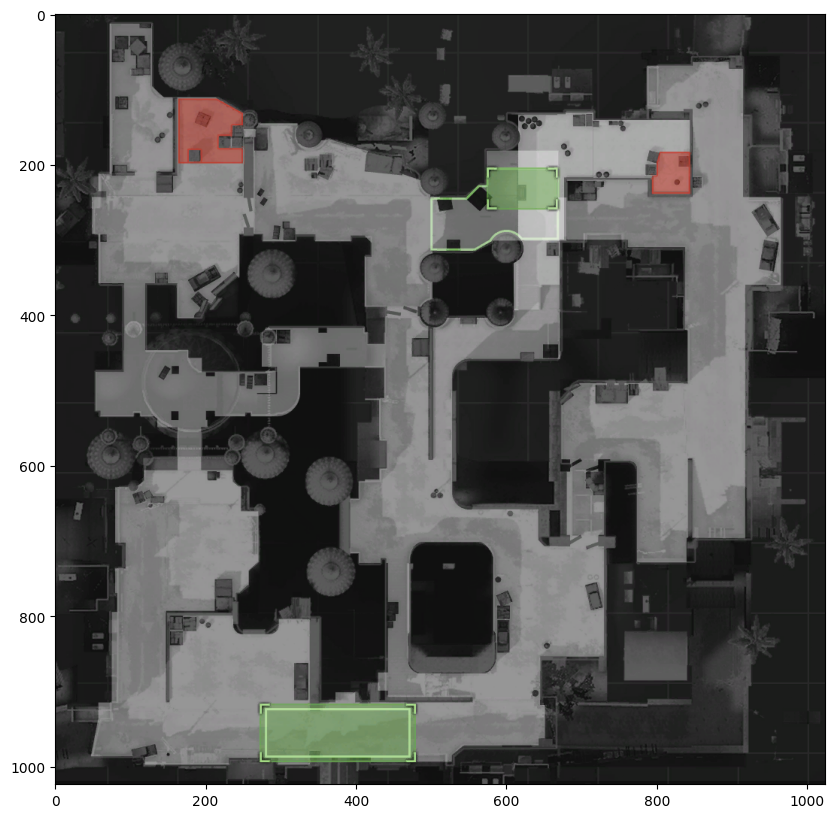

In [29]:
im = plt.imread('de_dust2.png')
plt.figure(figsize=(10,10))
t = plt.imshow(im)
t = plt.scatter(tr_data['victim_mapX'], tr_data['victim_mapY'],alpha=0.05,c='red')


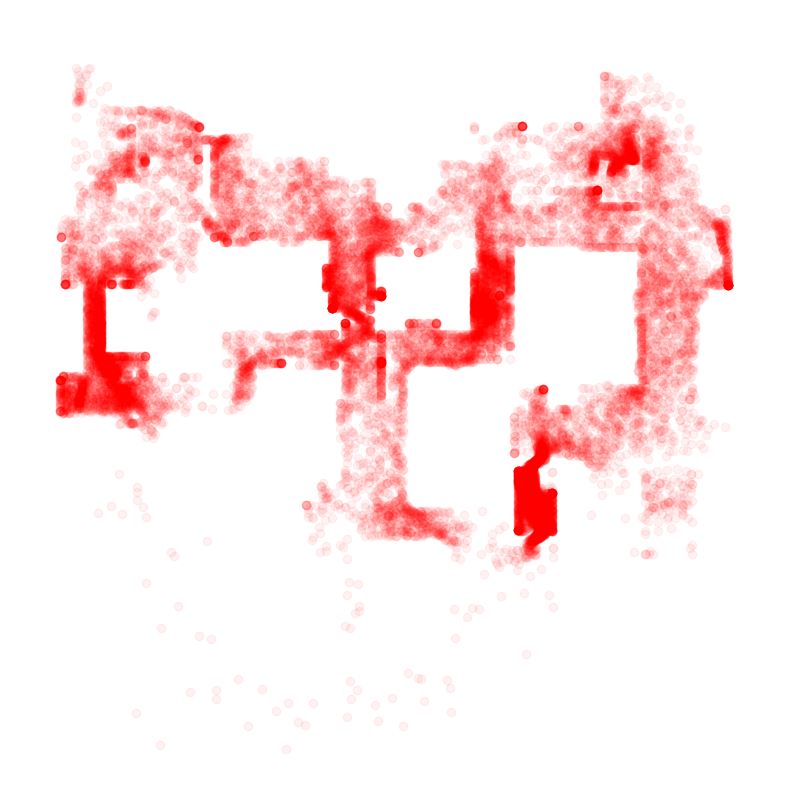

In [30]:

# 创建散点图
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(0, 1024)  # 设置横坐标范围
ax.set_ylim(1024, 0)  # 设置纵坐标范围
ax.scatter(tr_data['victim_mapX'], tr_data['victim_mapY'], alpha=0.05, c='red')

ax.axis('off')

# 保存散点图
#scatter_path = 'E:/MyWebSite/source/CSGO/dust2_shotgun.png'
#plt.savefig(scatter_path, transparent=True, bbox_inches='tight', pad_inches=0)
plt.show()